In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.applications import EfficientNetB7
from keras.callbacks import ReduceLROnPlateau
from keras.utils import image_dataset_from_directory
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import keras
import pickle

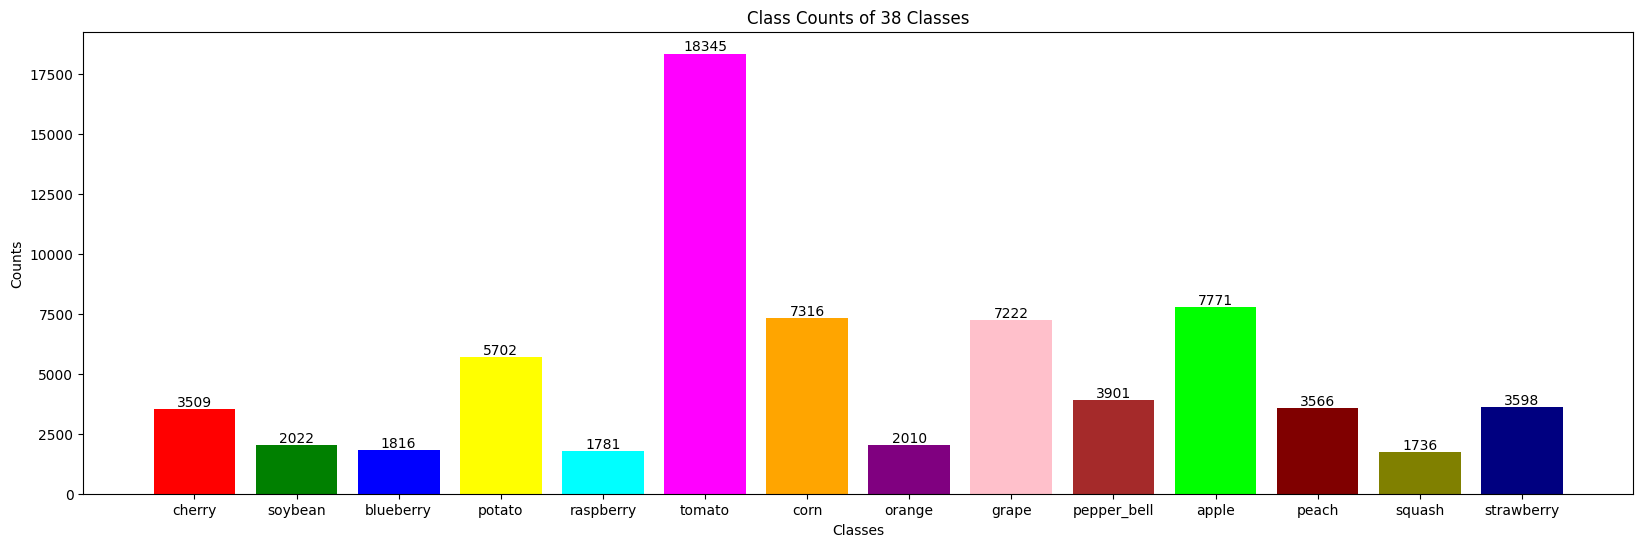

In [3]:
data_path = 'data/train/stage_one'
classes = os.listdir(data_path) # names of folders are the names of classes
class_counts = [len(os.listdir(data_path + '/' + x)) for x in classes] # length of respective classes is the count of images available for the respective class
#print(class_counts)
plt.figure(figsize=(20, 6))
bars = plt.bar(classes, class_counts, color = [
    "#FF0000", "#008000", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#FFA500",
    "#800080", "#FFC0CB", "#A52A2A", "#00FF00", "#800000", "#808000", "#000080"
]) # 38 random colors chosen for better visualisation
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Class Counts of 38 Classes')
# Code to display count of each class on top of respective bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height}', 
        ha='center', 
        va='bottom'
    )

In [4]:
val_path = "data/valid/stage_one"
train_path = "data/train/stage_one/"
img_size =(256,256)
batch_size = 32
train_dataset = image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    seed=123
)
class_names = train_dataset.class_names
val_dataset = image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    seed=42
)

base_model = keras.applications.EfficientNetB3(
    input_shape=(256, 256, 3), 
    include_top=False,             
    weights='imagenet',
    pooling='max'
) 

for layer in base_model.layers:
    layer.trainable = False

Found 70295 files belonging to 14 classes.


I0000 00:00:1743674185.807001    4676 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5896 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 17572 files belonging to 14 classes.


In [5]:
# Build model
inputs = base_model.input
x = BatchNormalization()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(38, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train model
ep = 10
history = model.fit(train_dataset, validation_data=val_dataset, epochs=ep)

Epoch 1/10


I0000 00:00:1743674203.331228    8501 service.cc:148] XLA service 0x7f5954003000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743674203.331354    8501 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2025-04-03 15:26:43.710670: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743674205.243441    8501 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-03 15:26:47.188185: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17962_0', 88 bytes spill stores, 120 bytes spill loads

2025-04-03 15:26:48.173918: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_

   3/2197 ━━━━━━━━━━━━━━━━━━━━ 2:14 61ms/step - accuracy: 0.1146 - loss: 3.4732      

I0000 00:00:1743674223.237912    8501 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8918 - loss: 0.3652

2025-04-03 15:29:09.867928: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17962_0', 328 bytes spill stores, 424 bytes spill loads

2025-04-03 15:29:10.760406: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17962', 92 bytes spill stores, 92 bytes spill loads

2025-04-03 15:29:12.128626: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18851', 24 bytes spill stores, 24 bytes spill loads

2025-04-03 15:29:12.215778: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18855', 32 bytes spill stores, 32 bytes spill loads

2025-04-03 15:29:12.404586: I external/local_xla/xla

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 216s 85ms/step - accuracy: 0.8918 - loss: 0.3651 - val_accuracy: 0.9807 - val_loss: 0.0756
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 152s 69ms/step - accuracy: 0.9673 - loss: 0.1166 - val_accuracy: 0.9846 - val_loss: 0.0569
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 153s 70ms/step - accuracy: 0.9760 - loss: 0.0904 - val_accuracy: 0.9868 - val_loss: 0.0616
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 154s 70ms/step - accuracy: 0.9788 - loss: 0.0776 - val_accuracy: 0.9899 - val_loss: 0.0452
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 155s 71ms/step - accuracy: 0.9824 - loss: 0.0675 - val_accuracy: 0.9892 - val_loss: 0.0558
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 156s 71ms/step - accuracy: 0.9850 - loss: 0.0554 - val_accuracy: 0.9869 - val_loss: 0.0774
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 157s 71ms/step - accuracy: 0.9865 - loss: 0.0571 - val_accuracy: 0.9891 - val_loss: 0.0479
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 156s 71ms/step - accuracy: 0.9877 - lo

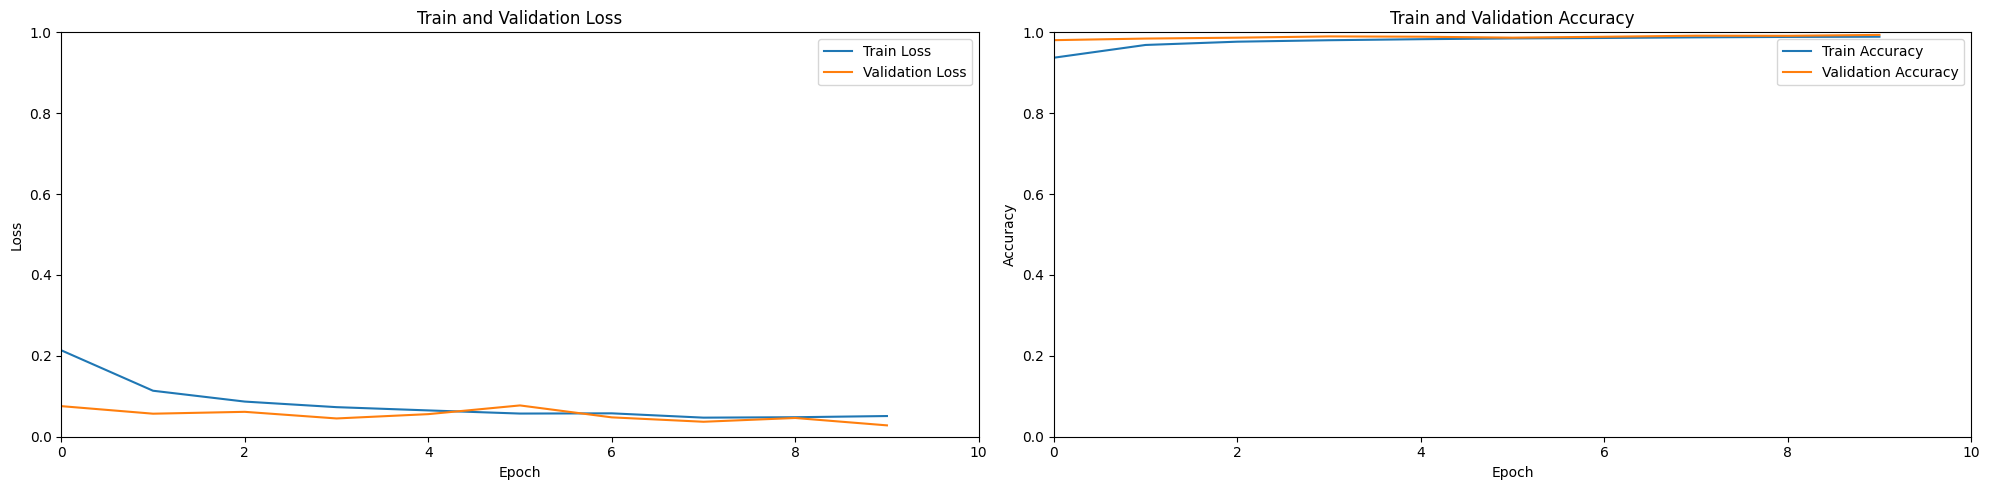

In [7]:
import tensorflow as tf
# tf.saved_model.save(model, 'two_stage')
model.save('stage_one.h5')

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()
plt.tight_layout()

In [2]:
from keras import layers
from keras.applications import EfficientNetB5
import tensorflow as tf
def build_model():
    
    # Load the EfficientNetB5 base model with pre-trained ImageNet weights
    base_model = EfficientNetB5(
        input_shape=(256, 256, 3), 
        include_top=False, 
        weights='imagenet'
    )

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Create the model
    inputs = base_model.input
    x = base_model.output

    # Add additional Conv2D layers
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Flatten the feature maps
    x = layers.Flatten()(x)

    # Add Dense layers
    x = layers.Dense(1024, activation='relu')(x)
    #x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    #x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)

    # Output layer
    outputs = layers.Dense(10, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

    # Print the model summary
    #model.summary()
    return model

In [5]:
import pickle

series1 = ['apple', 'blueberry','cherry','corn','grape','orange','peach','pepper_bell','potato','raspberry','soybean','squash','strawberry','tomato']
series = ['tomato']
histories = {}
models = {}
for i in series:
    val_path = "data/valid/stage_two/"+i
    train_path = "data/train/stage_two/"+i
    try:
        os.mkdir(i)
    except:
        pass
    img_size =(256,256)
    batch_size = 32
    train_dataset = image_dataset_from_directory(
        train_path,
        image_size=img_size,
        batch_size=batch_size,
        seed=123
    )
    class_names = train_dataset.class_names
    val_dataset = image_dataset_from_directory(
        val_path,
        image_size=img_size,
        batch_size=batch_size,
        seed=42
    )
    model = build_model()
    ep = 10
    history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=ep)
    histories[i] = history
    models[i] = model
   
    tf.saved_model.save(model, i)
    with open(i+"/history.pkl","wb") as f:
        pickle.dump(history.history, f)
        
    with open(i+"/model.pkl","wb") as f:
        pickle.dump(model, f)
    print(i, "saved!!")
    del model

Found 18345 files belonging to 10 classes.
Found 4585 files belonging to 10 classes.
Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 135s 184ms/step - accuracy: 0.6575 - loss: 0.9808 - val_accuracy: 0.7422 - val_loss: 0.7950
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 77s 134ms/step - accuracy: 0.8712 - loss: 0.3942 - val_accuracy: 0.8497 - val_loss: 0.4859
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 74s 129ms/step - accuracy: 0.9121 - loss: 0.2731 - val_accuracy: 0.9197 - val_loss: 0.2632
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 75s 130ms/step - accuracy: 0.9257 - loss: 0.2303 - val_accuracy: 0.9086 - val_loss: 0.3205
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 77s 134ms/step - accuracy: 0.9351 - loss: 0.1958 - val_accuracy: 0.8992 - val_loss: 0.3474
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 76s 132ms/step - accuracy: 0.9478 - loss: 0.1572 - val_accuracy: 0.9200 - val_loss: 0.3018
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 76s 133ms/step - accuracy: 0.9525 - loss: 0.1490 - val_accuracy: 0.9348 - val_loss: 0.21

INFO:tensorflow:Assets written to: tomato/assets


tomato saved!!


In [8]:
series = ['apple', 'blueberry','cherry','corn','grape','orange','peach','pepper_bell','potato','raspberry','soybean','squash','strawberry','tomato']
histories = {}
models = {}
for i in series:
    val_path = "data/valid/stage_two/"+i
    train_path = "data/train/stage_two/"+i
    
    with open(i+"/history.pkl","rb") as f:
        history = pickle.load(f)
        
    with open(i+"/model.pkl","rb") as f:
        model = pickle.load(f)

    histories[i] = history
    models[i] = model

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7bf63efd2310>>
Traceback (most recent call last):
  File "/home/siddharth/projects/mps/mpsenv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [7]:
import pickle
with open('histories.pkl', 'wb') as file:
    pickle.dump(histories, file)

with open('models.pkl', 'wb') as file:
    pickle.dump(models, file)

In [10]:
def plot(name, history):    
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    plt.title("Train and Validation Loss("+name+')')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.plot(history['loss'],label="Train Loss")
    plt.plot(history['val_loss'], label="Validation Loss")
    plt.xlim(0, 10)
    plt.ylim(0.0,1.0)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title("Train and Validation Accuracy("+name+')')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.plot(history['accuracy'], label="Train Accuracy")
    plt.plot(history['val_accuracy'], label="Validation Accuracy")
    plt.xlim(0, 10)
    plt.ylim(0.0,1.0)
    plt.legend()
    plt.tight_layout()

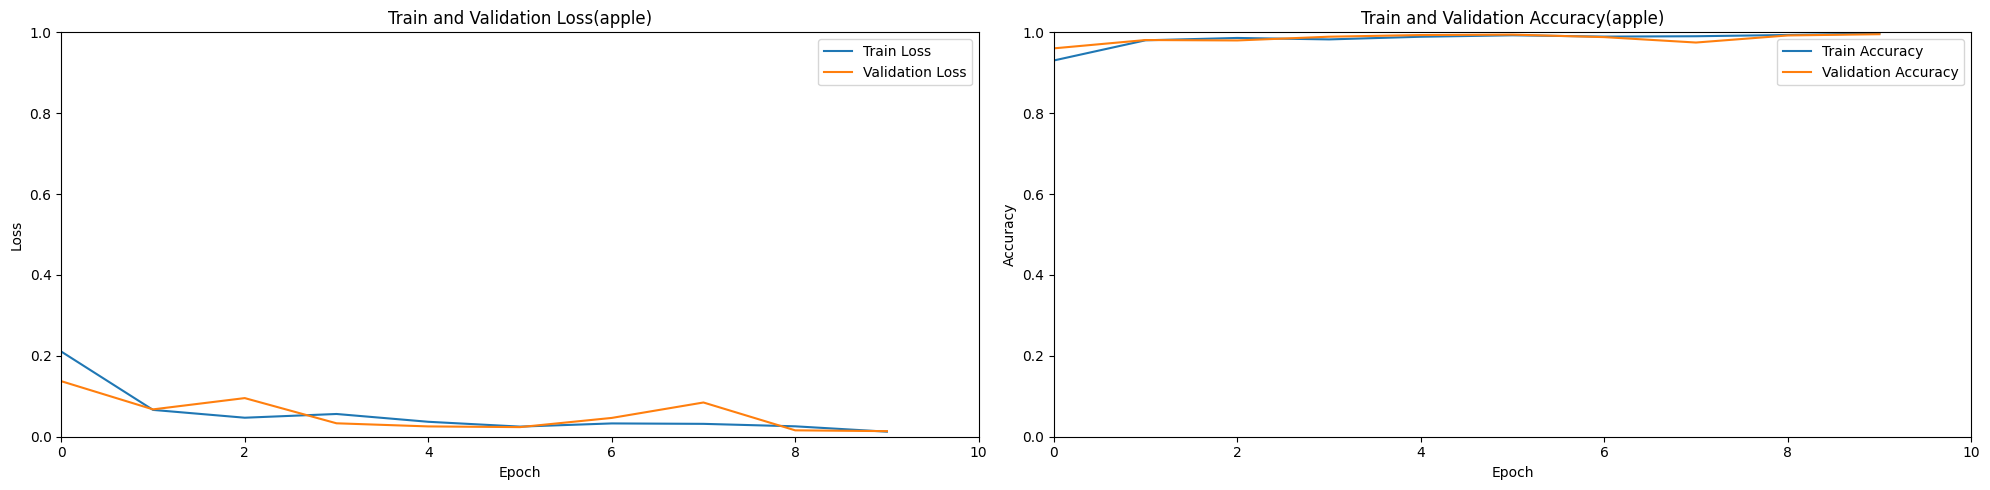

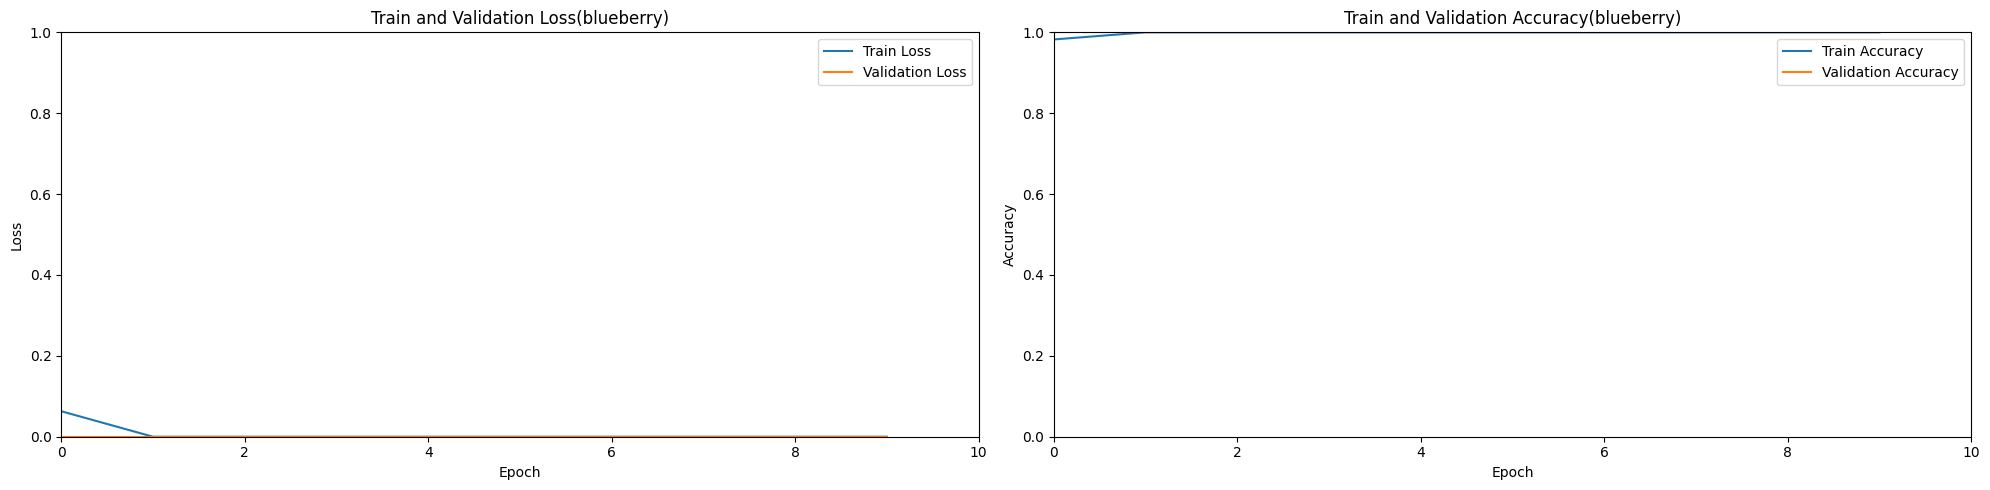

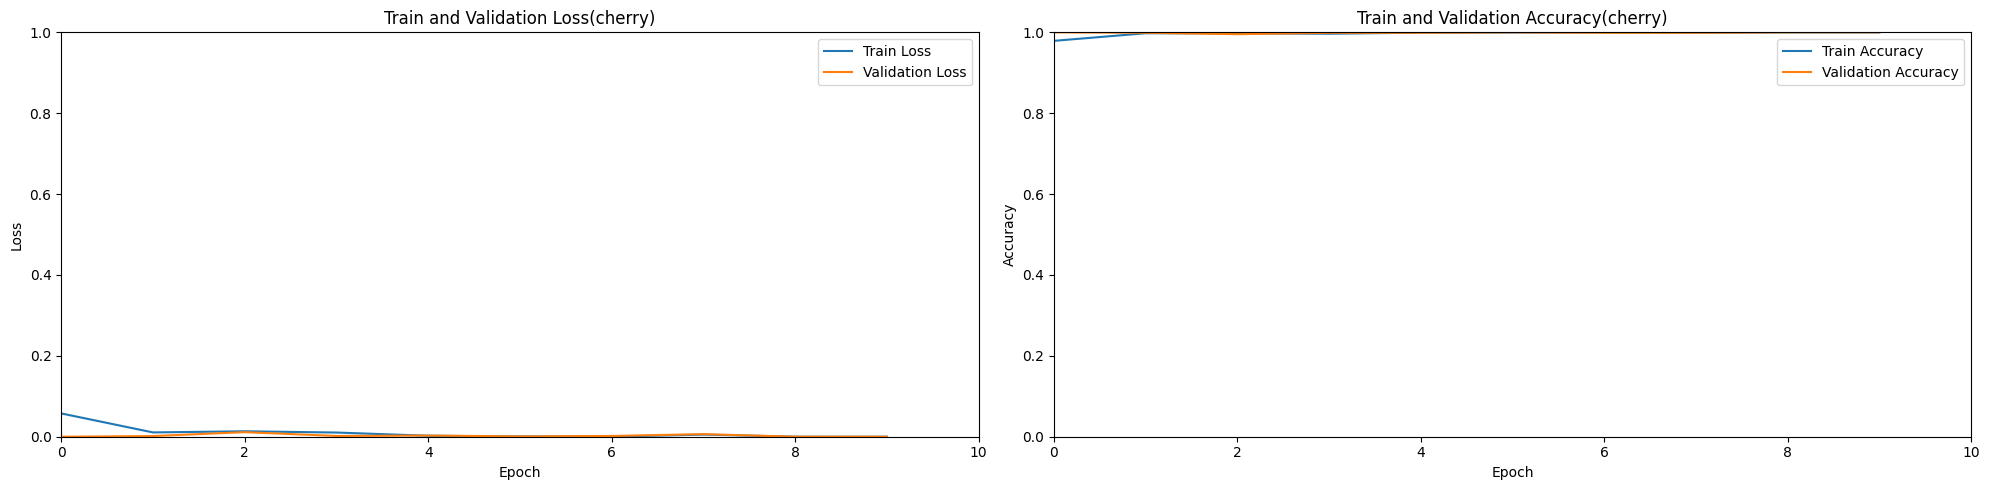

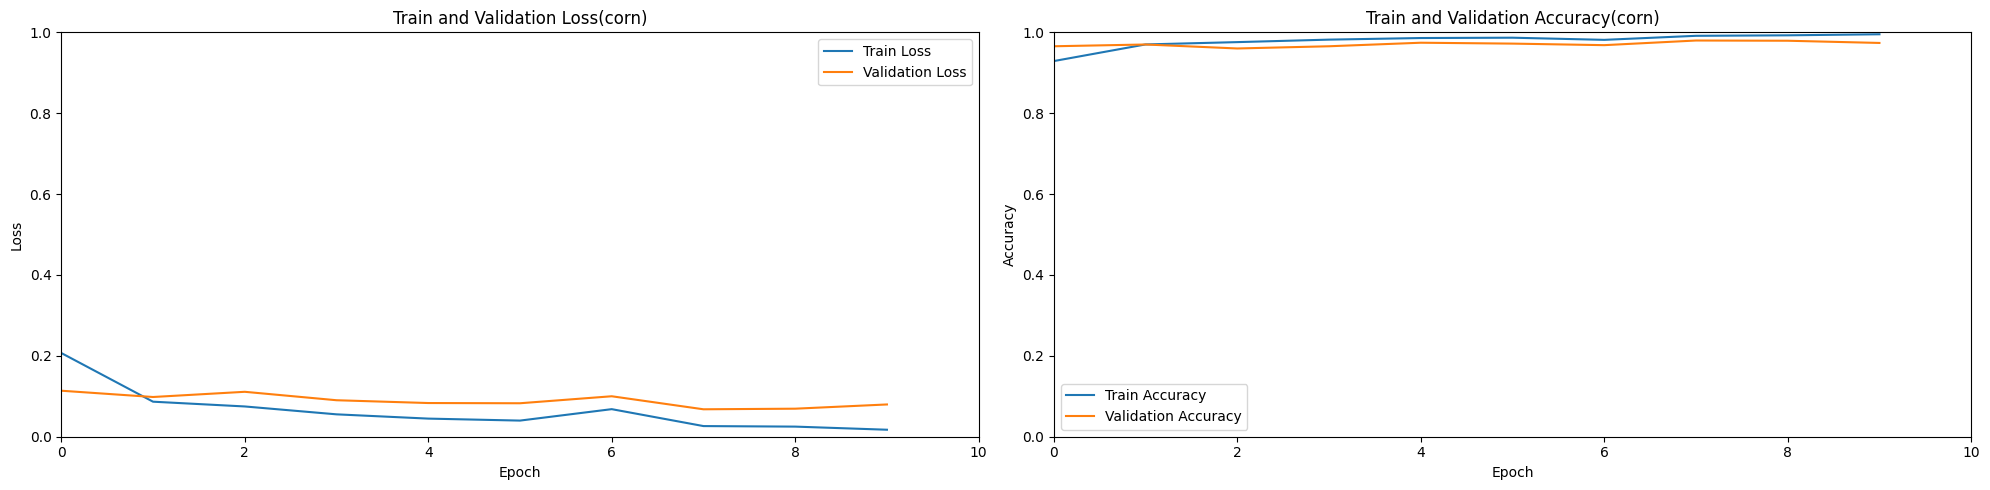

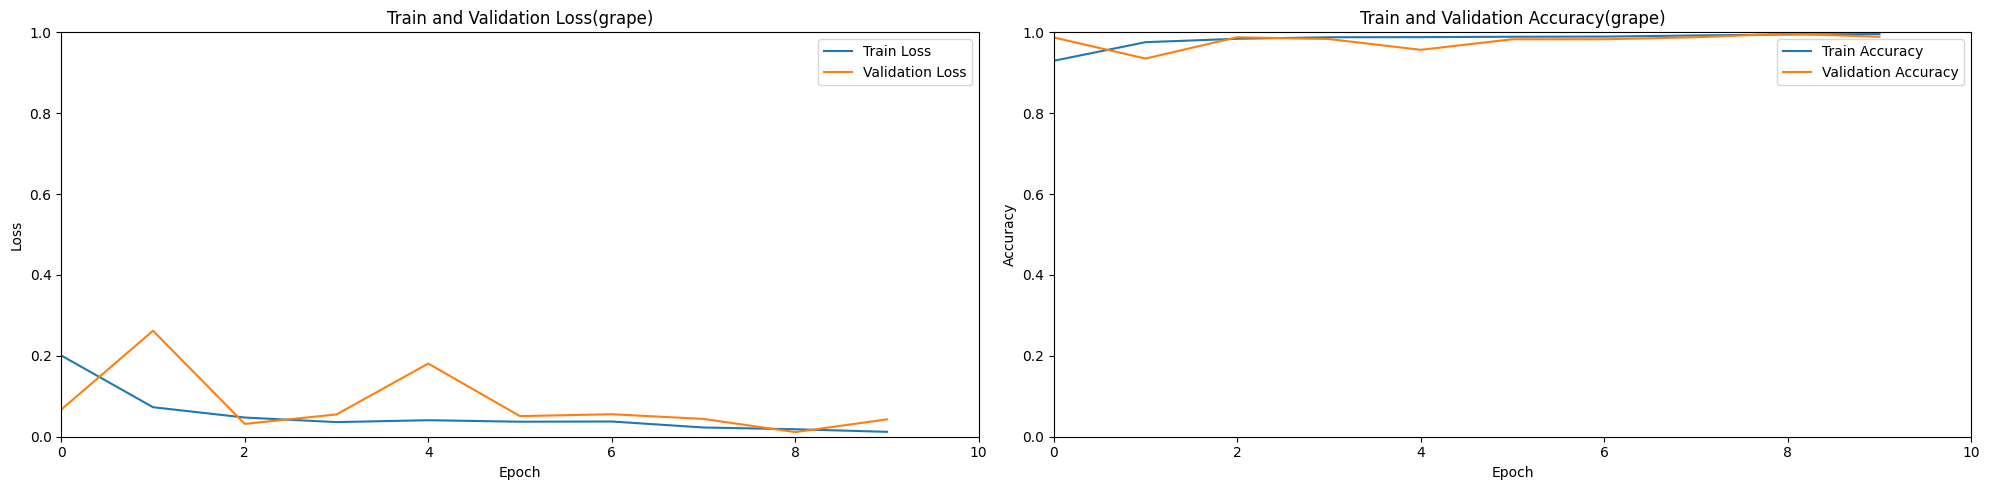

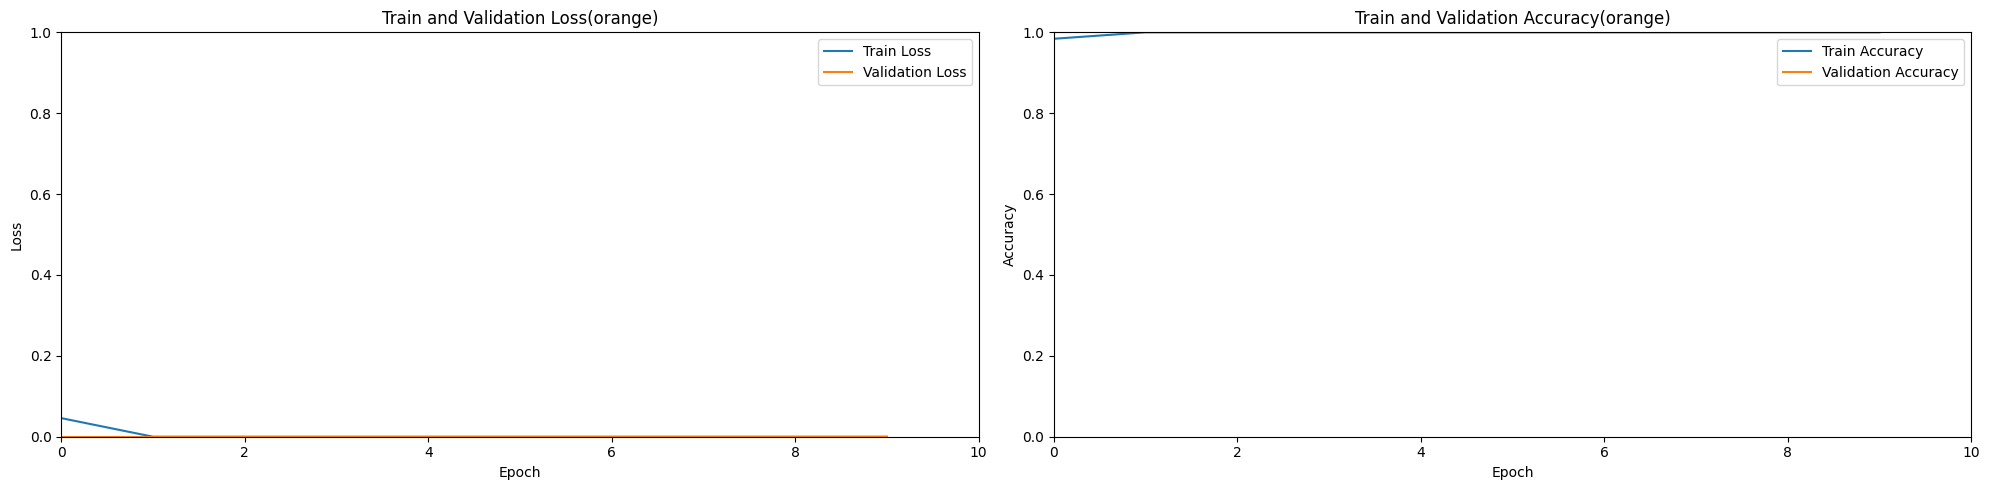

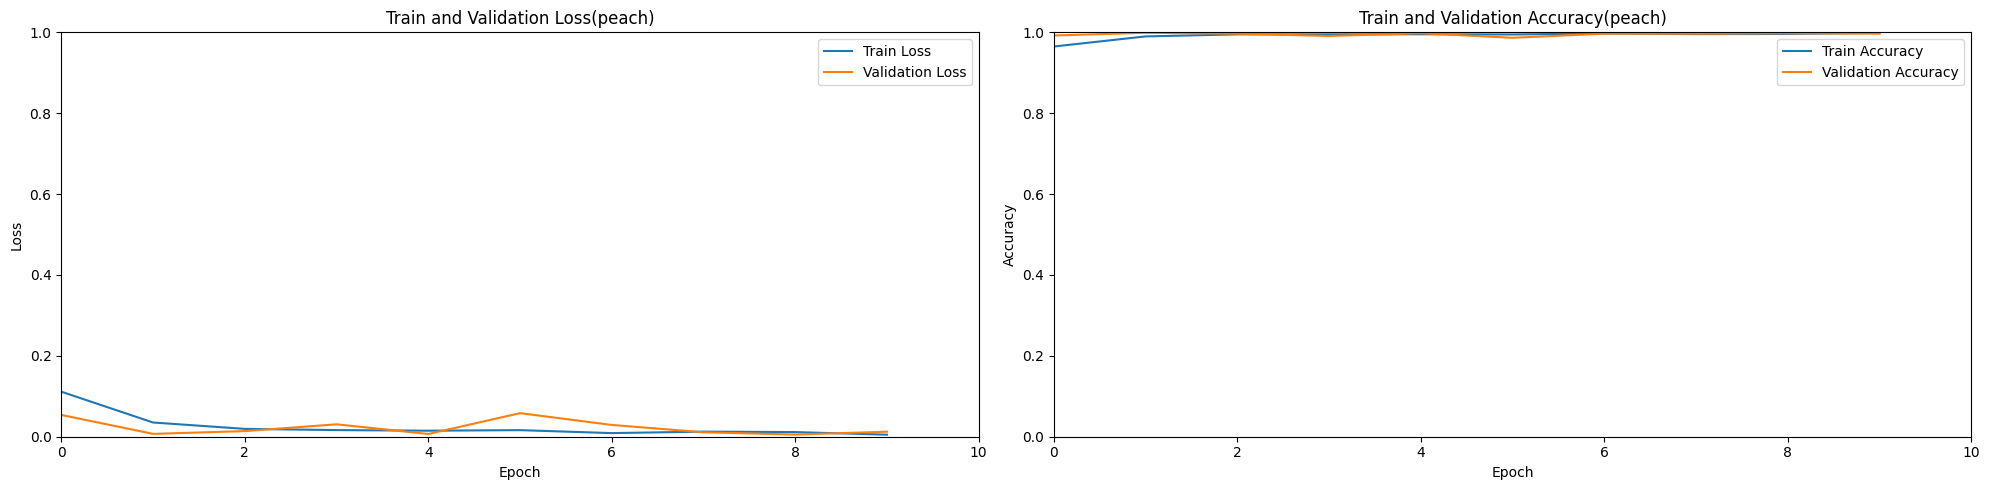

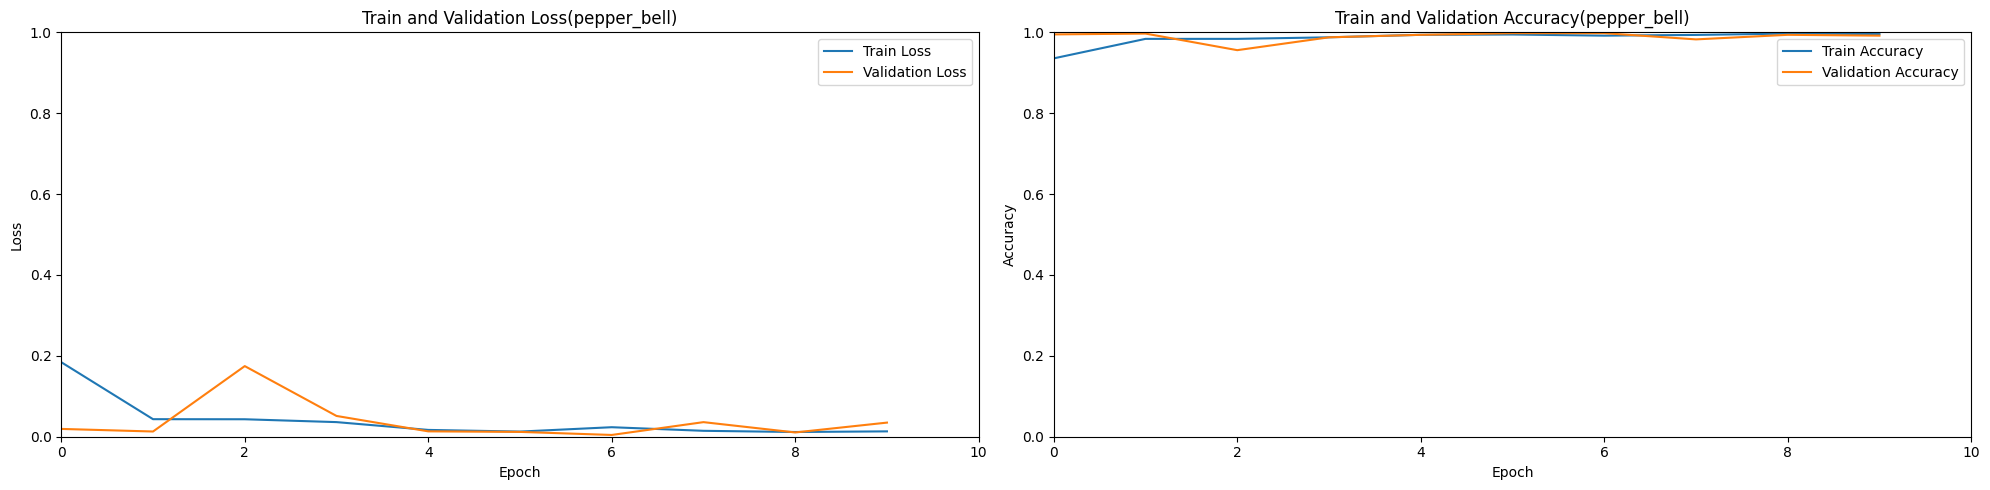

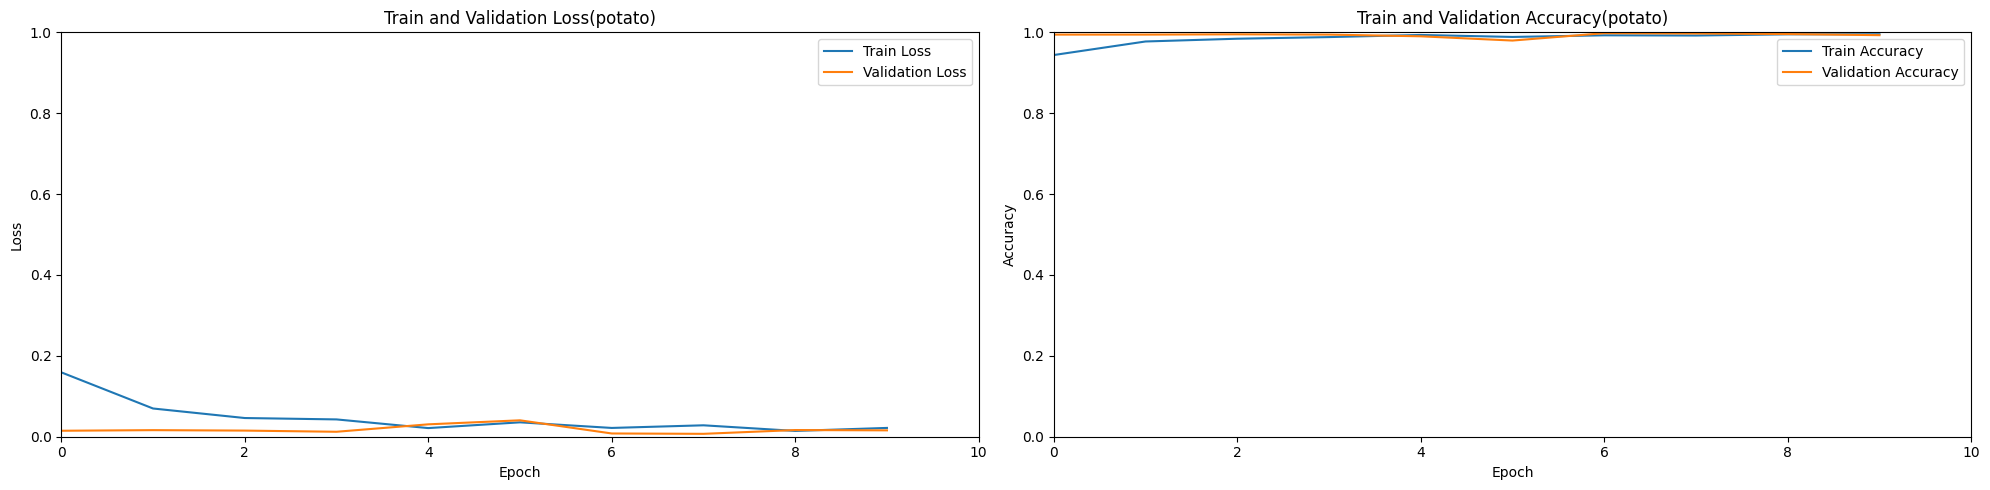

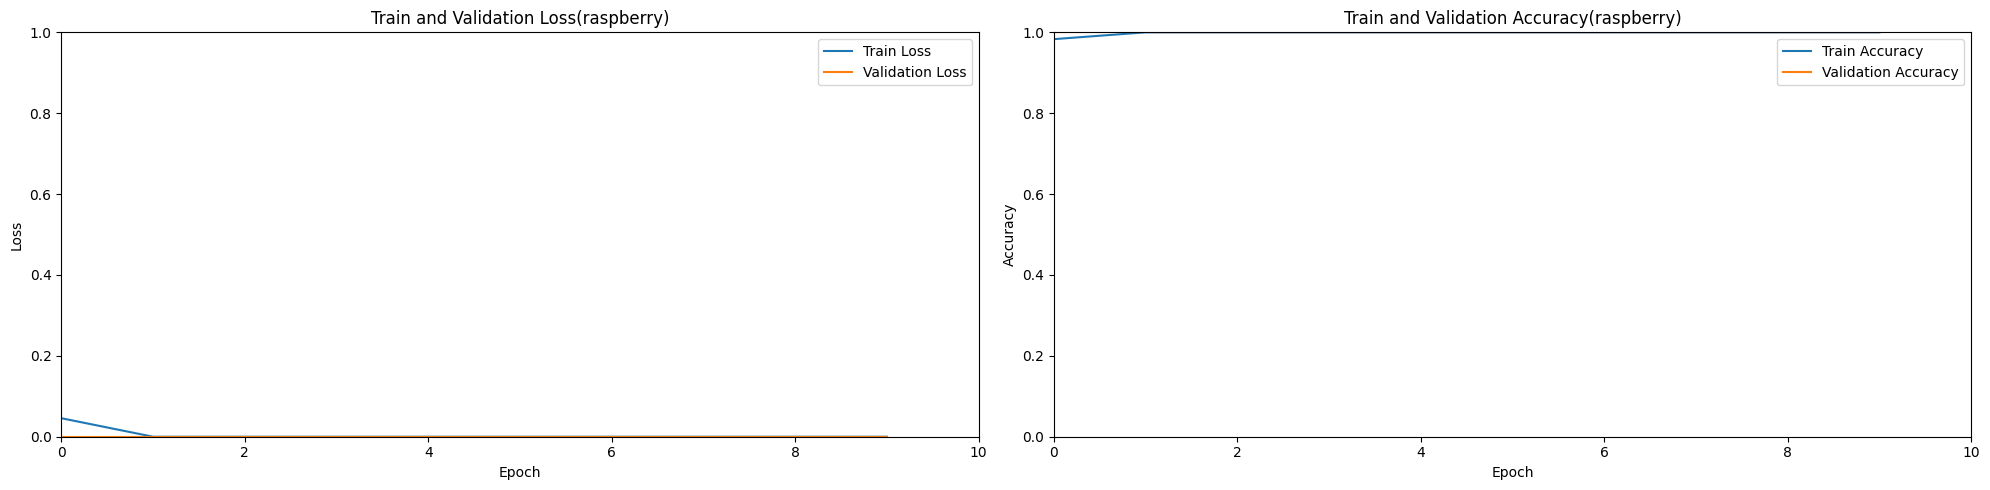

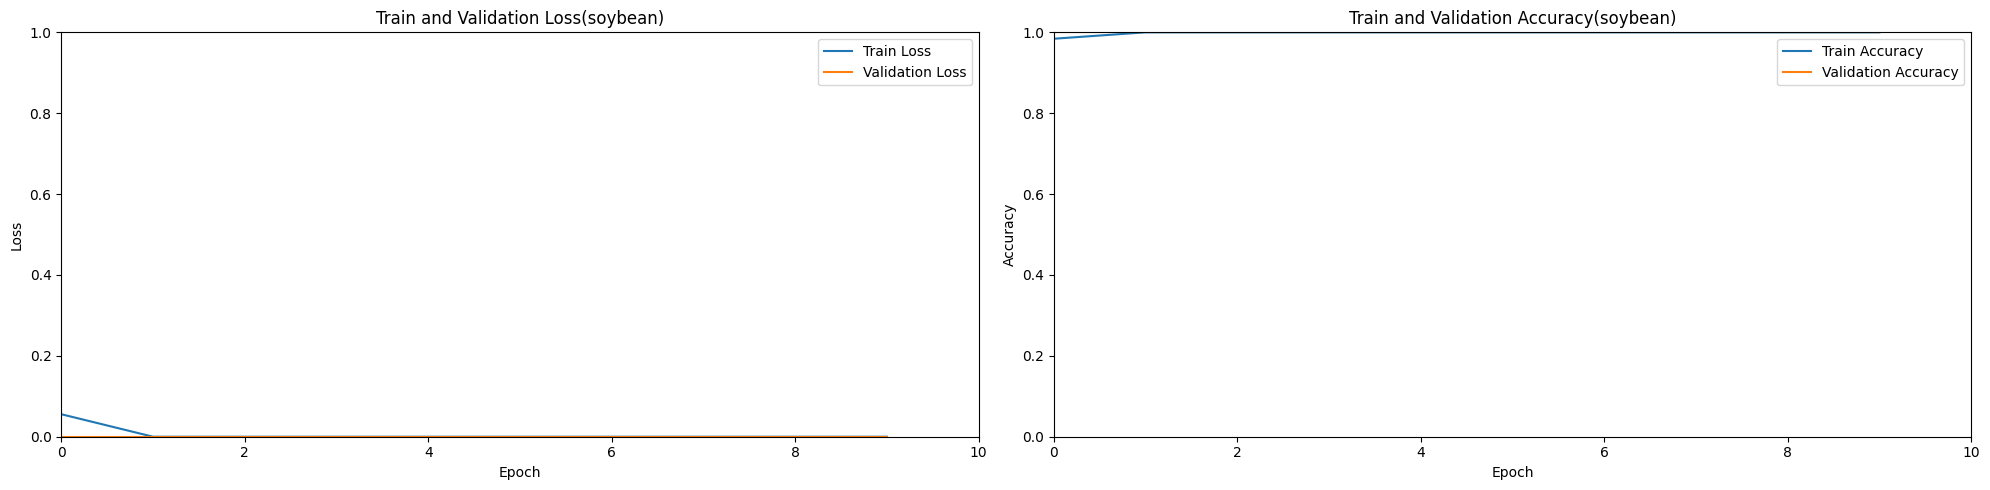

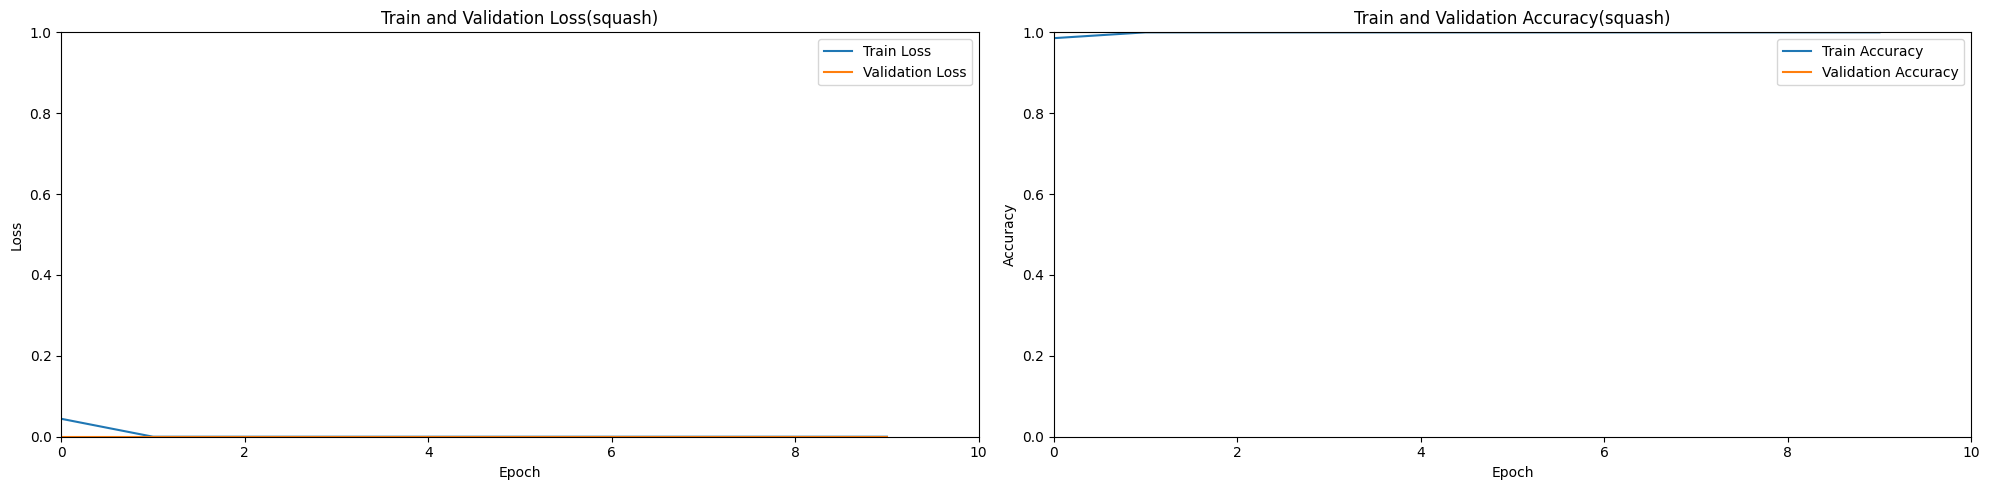

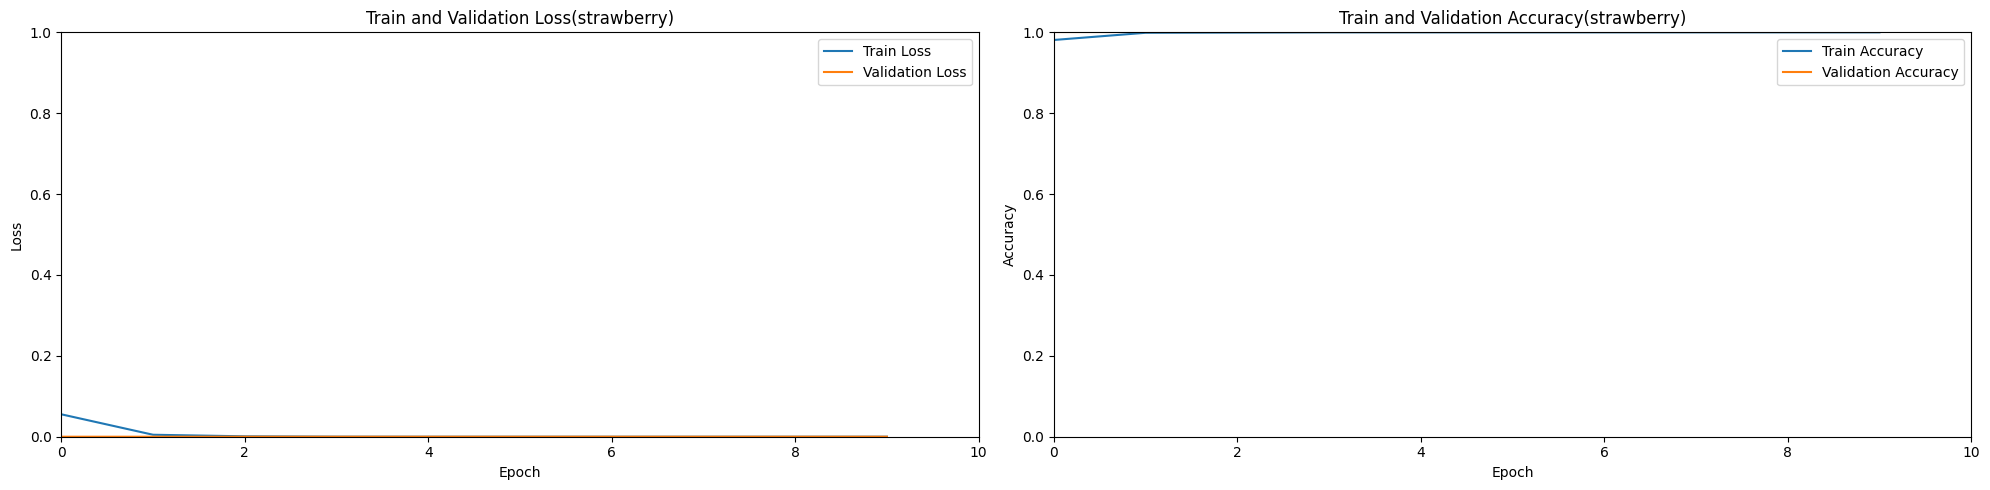

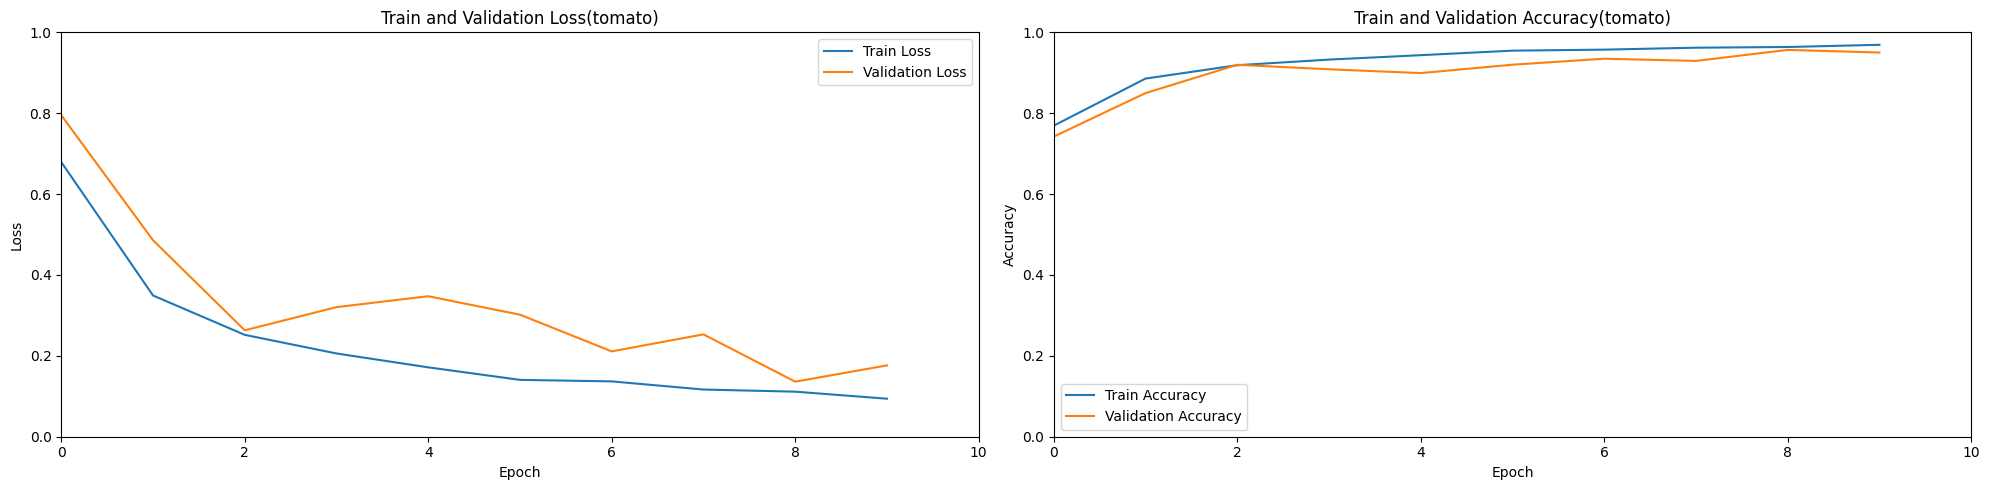

In [11]:
for history in histories:
    plot(history, histories[history])

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.applications import EfficientNetB7
from keras.callbacks import ReduceLROnPlateau
from keras.models import load_model
from keras.utils import image_dataset_from_directory
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import img_to_array
import tensorflow as tf
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import keras
import pickle

2025-04-04 12:19:16.179511: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-04 12:19:16.193084: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743749356.207749  129583 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743749356.211344  129583 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-04 12:19:16.225092: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# stage_one = tf.saved_model.load('two_stage')
# stage_one = tf.keras.models.load_model("two_stage")

stage_one = load_model('stage_one.h5')

with open('models.pkl', 'rb') as f:
    models = pickle.load(f)

print('stage two models loaded!')

def preprocess_image(img_path, target_size=(256,256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    print("preprocessing done!!")
    return img_array

I0000 00:00:1743749366.797059  129583 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5845 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


stage two models loaded!


In [3]:
path = "data/valid/stage_two/apple/Apple___Black_rot/0b8dabb7-5f1b-4fdc-b3fa-30b289707b90___JR_FrgE.S 3047_90deg.JPG"
img = image.load_img(path)
input_arr = img_to_array(img)
input_arr = np.array([input_arr])
preds = models['apple'].predict(input_arr)
print(preds)

idx = np.argmax(preds)
print(idx)
# name = models['apple'].output_names(idx)

I0000 00:00:1743749410.152276  129929 service.cc:148] XLA service 0x72620c002800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743749410.152336  129929 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2025-04-04 12:20:10.354073: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743749411.302750  129929 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
[[3.7725638e-07 9.9999964e-01 6.7382391e-11 7.4550872e-09 8.5907628e-23
  1.8810905e-21 4.2447154e-22 2.7483101e-22 8.3118187e-24 5.8049374e-22]]
1


I0000 00:00:1743749416.806136  129929 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [13]:
def predict_disease(img_path):
    img_array = preprocess_image(img_path)

    # stage_one_pred = stage_one(img_array, training=False)
    # plant_idx = np.argmax(stage_one_pred.numpy())
    # plant = list(models.keys())[plant_idx]
    plant = "apple"

    model = models[plant]
    print("model selected")
    stage_two_pred = model(img_array, training=False)
    print("prediction received")
    print(stage_two_pred)
    print("--------------------------")
    disease_idx = np.argmax(stage_two_pred.numpy())
    disease = model.output_names[disease_idx]

    return plant, disease

In [14]:
path = "data/valid/stage_one/apple/0a02e8cb-b715-497f-a16a-c28b3409f927___RS_HL 7432.JPG"
# plant, disease = predict_disease(path)
img = image.load_img(path)
input_arr = img_to_array(img)
input_arr = np.array([input_arr])
pred = stage_one.predict(input_arr)
idx = np.argmax(pred)
# print(plant,disease)
print(idx)

path = "data/valid/stage_one/blueberry/0a0b8f78-df2d-4cfc-becf-cde10fa2766b___RS_HL 5487.JPG"
img = image.load_img(path)
input_arr = img_to_array(img)
input_arr = np.array([input_arr])
pred = stage_one.predict(input_arr)
# print(plant,disease)
idx = np.argmax(pred)
print(idx)

# print(stage_one.summary())

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.applications import EfficientNetB7
from keras.callbacks import ReduceLROnPlateau
from keras.models import load_model
from keras.utils import image_dataset_from_directory
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import img_to_array
import tensorflow as tf
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import keras
import pickle

2025-04-04 12:22:35.371246: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-04 12:22:35.383538: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743749555.396800  132659 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743749555.400723  132659 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-04 12:22:35.415143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
def load_models():
    stage_one = load_model('stage_one.h5')
    with open('models.pkl', 'rb') as f:
        stage_two = pickle.load(f)
    
    print("models loaded")

    return stage_one, stage_two

def results(path):
    stage_one, stage_two = load_models()
    img = image.load_img(path)
    print('image loaded')
    input_arr = np.array([img_to_array(img)])
    
    stage_one_preds = stage_one_pred(stage_one, input_arr)
    print(stage_one_preds)

    stage_two_preds = stage_two_pred(stage_two[stage_one_preds], input_arr, stage_one_preds)
    print(stage_two_preds)

    return stage_one_preds+" "+stage_two_preds

def stage_one_pred(model, input_arr):
    classes = ['apple','blueberry','cherry','corn','grape','orange','peach','pepper_bell','potato','raspberry','soybean','squash','strawberry','tomato']
    pred = model.predict(input_arr)
    # print(plant,disease)
    idx = np.argmax(pred)
    predicted_class = classes[idx]
    print(predicted_class)
    return predicted_class

def stage_two_pred(model, input_arr, plant):
    classes = {
        "apple": ["Scab",'Black Rot','Cedar Apple Rust','Healthy'],
        "blueberry":["Healthy"],
        "cherry":['Healthy','Powdery Mildew'],
        "corn":['Cercospora leaf','Common rust','Healthy','Northern Leaf Blight'],
        "grape":['Black Rot','Healthy','Leaf Blight'],
        "orange":['Citrus Greening'],
        "peach":['Bacterial_spot','Healthy'],
        "pepper_bell": ['Bacterial_spot','Healthy'],
        "potato":['Early Blight','Healthy','Late Blight'],
        "raspberry":['Healthy'],
        "soybean":['Healthy'],
        "squash":['Powdery Mildew'],
        "strawberry":['Healthy','Leaf Scorch'],
        "tomato":['Bacterial_spot','Early Blight','healthy','Late Blight','Leaf Mold','Septoria Leaf Spot','Spider mites','Target Spot','Mosaic Virus','Yellow Leaf Curl Virus']
    }
    pred = model.predict(input_arr)
    # print(plant,disease)
    idx = np.argmax(pred)
    predicted_class = classes[plant][idx]
    print(predicted_class)
    return predicted_class

In [5]:
results("data/valid/stage_two/corn/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/0a01cc10-3892-4311-9c48-0ac6ab3c7c43___RS_GLSp 9352_new30degFlipLR.JPG")

models loaded
image loaded
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
corn
corn
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Cercospora leaf
Cercospora leaf


'corn Cercospora leaf'